## Google Data Analysis Professional Certificate 
## Case Study 1:How does a bike-share navigate speedy success?
**Prepared by Srinivasan V,04-12-2024,Chennai,India**

[Link](https://www.coursera.org/professional-certificates/google-data-analytics)  to the course.
[Link](https://divvy-tripdata.s3.amazonaws.com/index.html) to the data set.


### 1.1 Scenario
You work as a junior data analyst. A new project arises from the company called **Cyclistic**, a bike-share company in Chicago. According to the director of marketing, **maximizing the number of annual memberships** will contribute to the company's future sucess. 

Essentially, the objective of the project is **to understand how casual riders and annual members use Cyclistic bikes differently.** The marketing team will then be able to utilise the data analyzation findings and insights to help them in their data-driven decisions. 

To clarify some terms, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **annual members** are those who purchase annual memberships.

This project will be analyzing the data for the **year from 2023 December to 2024 November.**

### 1.2 Company background
The company, **Cyclistic** was launched in 2016. They have now grown to have a fleet of 5,824 bicycles and a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to
any other station in the system anytime.

### 1.3 Analyzation method
- This case study will be analyzed using **Google's 6 Steps of the Data Analysis Process**.
- The 6 steps are: **ask, prepare, process, analyze, share,** and **act.**
- The project was advised to be carried out using SQL, RStudio and Tableau, but I will only be using **Python** for my own practice.

## 2 Ask Phase
 During the "Ask" phase, we ask many questions, and also questions about the questions, as specfic as possible. These questions aims to identify what problems we need to solve while considering the needs of the stakeholders. This phase helps us to dive deeper into the problem in order to obtain better clarity and understanding of the problem. 

Deliverable: **clear statement of the business task.**

### 2.1 Business task
As mentioned in the introduction, the main task of the project is **to understand how casual riders and annual members use Cyclistic bikes differently** for the year 2024.

## 3. Prepare Phase

During the "Prepare" phase, we prepare our data collection methodology. Do we require qualitative or quantitative data, do we collect our data through surveys, interviews or existing sources, how do we avoid bias during the data collection process, these are all relevant questions needed to be answered during this phase.

Deliverable: **descriptions of all data sources used.**

### 3.1 Descriptions of data sources used
The [data set](https://divvy-tripdata.s3.amazonaws.com/index.html) used has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).

## 4. Process Phase
The "Process" phase is where the data collected are being processed, this includes connecting the data sources, cleaning the data, filtering and choosing the data, calculating the confidence level of the data etc.

Deliverable: **documentation of any cleaning or manipulation of data**.

### 4.1 Documentation of data cleaning and manipulation
I will be using **Pandas** for the data cleaning and manipulations. 
The actions that I carried out are as follows:

1. Since the data for each month are in a seperate file, I import each file individually.
2. Then I merge these files into one data frame which enable me to analyze them in term of the year 2023 December to 2024 November.
3. Identify the columns and type of each column of the data frame.
4. Check for null values.
    - Drop the null values (if any), and reconfirm that there are no longer null values
5. Delete the columns that are not necessary.
6. Check for duplicates.
    - Drop the duplicated values (if any), and reconfirm that there are no longer duplicated values
7. Modify the data type of certain column.
    - Convert _**started_at**_ column and _**ended_at**_ column from  "object" to "datetime64"
    - To **extract the hour, day, month and date** to form new columns based on them
    - To calculate the **ride duration**
8. Check the order of the day, month.
9. Create a new column _**ride_duration**_ that calculates the duration of each ride.
    - Express the ride duration in terms of only **minutes** , and not **minutes and seconds**
    - Check whether there are **negative values** for the ride duration which would be illogical
    - Remove the rows that have negative values
10. Export the file of the cleaned data.

### 4.1.1 Read each csv file individually

In [12]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

In [14]:
####Read the each file seprately and then merge them together
dec_23=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202312-divvy-tripdata.csv')
jan_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202401-divvy-tripdata.csv')
feb_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202402-divvy-tripdata.csv')
march_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202403-divvy-tripdata.csv')
april_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202404-divvy-tripdata.csv')
may_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202405-divvy-tripdata.csv')
june_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202406-divvy-tripdata.csv')
july_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202407-divvy-tripdata.csv')
aug_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202408-divvy-tripdata.csv')
sep_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202409-divvy-tripdata.csv')
oct_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202410-divvy-tripdata.csv')
nov_24=pd.read_csv('D:/Google-Data-Analytics-Case-Study-Python-main/case_study/202411-divvy-tripdata.csv')

#Merging all the data together
df=pd.concat([dec_23,jan_24,feb_24,march_24,april_24,may_24,june_24,july_24,aug_24,sep_24,oct_24,nov_24],ignore_index=True)


In [15]:
### Identify the respective coloumns and their data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906269 entries, 0 to 5906268
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.8+ MB


#### From this we can see that there are totally 12 coloumns and 4 coloums have a float64 has datatype nad remaining have object  has datatype

### 4.1.2 Checking for null values

In [16]:
df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1080470
start_station_id      1080470
end_station_name      1111801
end_station_id        1111801
start_lat                   0
start_lng                   0
end_lat                  7340
end_lng                  7340
member_casual               0
dtype: int64

We can see around 70K null values for some colums.These null values are the main obstacles while Data analysis.
Just remove those null values from our data

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### 4.1.3 Deleting coloums that are unnecessary

In [18]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id',
             'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244722 entries, 189 to 5906268
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 194.3+ MB


### 4.1.4 Checking for Duplicated values

In [19]:
df.duplicated().sum()

np.int64(0)

We are all good to go since there are no duplicated values, if there are, we should drop them too.

### 4.1.5 Changing the Datatype

We will be converting the column type for two columns, __**started_at**__ column and __**ended_at**__ column from the data type **"object"** to the data type **"datetime64"**

There are 2 reasons for this:
- To **extract the hour, day, month and date** to form new columns based on them
- To calculate the **ride duration**

In [20]:
# To chech the current data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244722 entries, 189 to 5906268
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ride_id        object
 1   rideable_type  object
 2   started_at     object
 3   ended_at       object
 4   member_casual  object
dtypes: object(5)
memory usage: 194.3+ MB


Now to calculate travel duration, we are converting the started_at and ended _at from  **Object** to **DateTime64**, a date dataframe type.

In [21]:
df["started_at"] = df["started_at"].astype('datetime64[ns]')
df["ended_at"] = df["ended_at"].astype('datetime64[ns]')

# To check the updated data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4244722 entries, 189 to 5906268
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 194.3+ MB


The `[ns]` in `datetime64[ns]` specifies the precision of the datetime values in a pandas DataFrame or Series. Here, `ns` stands for nanoseconds, which is the highest precision available for datetime objects in pandas.

When you see `datetime64[ns]`, it means that the datetime values are stored with nanosecond precision. This is useful for applications that require very high precision for time data, such as financial data analysis or scientific experiments


### 4.1.6 Create new columns that specify the hour, the day, the month, the year of each ride. 


In [22]:
df['hour'] = df['started_at'].dt.hour # Toextract the hour
df['day'] = df['started_at'].dt.day_name() # Toextract the day of the week
df['date'] = df['started_at'].dt.day #To extract the date
df['month'] = df['started_at'].dt.month_name() # To extract the month
df['year'] = df['started_at'].dt.year #To extract the year


df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year
189,84BFC1F137684EAB,classic_bike,2023-12-02 23:12:51,2023-12-02 23:21:01,member,23,Saturday,2,December,2023
996,EEC92D30A70471E5,classic_bike,2023-12-14 13:43:14,2023-12-14 13:44:14,casual,13,Thursday,14,December,2023
1322,1C33464DEEB1F23C,electric_bike,2023-12-04 11:57:04,2023-12-04 12:13:59,casual,11,Monday,4,December,2023
1347,E0A61810C305E5EC,classic_bike,2023-12-04 09:34:22,2023-12-04 09:35:56,casual,9,Monday,4,December,2023
1348,0706CEB2E1924F3D,classic_bike,2023-12-04 09:36:27,2023-12-04 09:36:40,casual,9,Monday,4,December,2023


### 4.1.7 Check the order of the day, month

In [23]:
df.groupby(['member_casual', 'day'])['ride_id'].count() # Check order for the day

member_casual  day      
casual         Friday       226254
               Monday       179862
               Saturday     320126
               Sunday       266857
               Thursday     185330
               Tuesday      162466
               Wednesday    189189
member         Friday       386510
               Monday       395210
               Saturday     339014
               Sunday       297296
               Thursday     422869
               Tuesday      420348
               Wednesday    453391
Name: ride_id, dtype: int64

In [52]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)
df.groupby(['member_casual', 'day'])['ride_id'].count() 

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\3152813243.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  day      
casual         Monday       179850
               Tuesday      162462
               Wednesday    189180
               Thursday     185324
               Friday       226243
               Saturday     320107
               Sunday       266830
member         Monday       395195
               Tuesday      420321
               Wednesday    453359
               Thursday     422849
               Friday       386495
               Saturday     338994
               Sunday       297275
Name: ride_id, dtype: int64

### 4.1.8. Check the order of the day, month

In [24]:
df.groupby(['member_casual', 'day'])['ride_id'].count() # Check order for the day

member_casual  day      
casual         Friday       226254
               Monday       179862
               Saturday     320126
               Sunday       266857
               Thursday     185330
               Tuesday      162466
               Wednesday    189189
member         Friday       386510
               Monday       395210
               Saturday     339014
               Sunday       297296
               Thursday     422869
               Tuesday      420348
               Wednesday    453391
Name: ride_id, dtype: int64

The days are not arranged in the order that we want, so we have to arrange them

In [25]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)
df.groupby(['member_casual', 'day'])['ride_id'].count() 

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\3152813243.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['member_casual', 'day'])['ride_id'].count()


member_casual  day      
casual         Monday       179862
               Tuesday      162466
               Wednesday    189189
               Thursday     185330
               Friday       226254
               Saturday     320126
               Sunday       266857
member         Monday       395210
               Tuesday      420348
               Wednesday    453391
               Thursday     422869
               Friday       386510
               Saturday     339014
               Sunday       297296
Name: ride_id, dtype: int64

The days are now ordered accordingly as we want, which is Monday - Friday.

In [53]:
# Now we repeat for the month

df.groupby(['member_casual', 'month'])['ride_id'].count() # Check order for the month

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\2976806451.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  month    
casual         January       17712
               February      38168
               March         62801
               April         93927
               May          167524
               June         208397
               July         231970
               August       228518
               September    216143
               October      159354
               November      68800
               December      36682
member         January       96076
               February     146553
               March        167436
               April        203814
               May          274711
               June         285945
               July         308971
               August       312805
               September    320854
               October      289762
               November     177125
               December     130436
Name: ride_id, dtype: int64

The months are not arranged in the order that we want, so we have to arrange them.

In [54]:
# Arrange the month

month_ordered = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True)
df.groupby(['member_casual', 'month'])['ride_id'].count() 

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\2046636238.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



member_casual  month    
casual         December      36682
               January       17712
               February      38168
               March         62801
               April         93927
               May          167524
               June         208397
               July         231970
               August       228518
               September    216143
               October      159354
               November      68800
member         December     130436
               January       96076
               February     146553
               March        167436
               April        203814
               May          274711
               June         285945
               July         308971
               August       312805
               September    320854
               October      289762
               November     177125
Name: ride_id, dtype: int64

Perfect! The months are now arranged as wanted, which is January - December.

### 4.1.10. Create new column that calculate the duration of each ride

In [55]:
df['ride_duration'] = (df['ended_at'] - df['started_at'])/ pd.Timedelta(minutes=1) 
#Express the ride duration in terms of only minutes , and not minutes and seconds

df.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,hour,day,date,month,year,ride_duration
189,84BFC1F137684EAB,classic_bike,2023-12-02 23:12:51,2023-12-02 23:21:01,member,23,Saturday,2,December,2023,8.166667
996,EEC92D30A70471E5,classic_bike,2023-12-14 13:43:14,2023-12-14 13:44:14,casual,13,Thursday,14,December,2023,1.000000
1322,1C33464DEEB1F23C,electric_bike,2023-12-04 11:57:04,2023-12-04 12:13:59,casual,11,Monday,4,December,2023,16.916667
1347,E0A61810C305E5EC,classic_bike,2023-12-04 09:34:22,2023-12-04 09:35:56,casual,9,Monday,4,December,2023,1.566667
1348,0706CEB2E1924F3D,classic_bike,2023-12-04 09:36:27,2023-12-04 09:36:40,casual,9,Monday,4,December,2023,0.216667


### 4.1.9. Verify if there are negative values for the duration of ride, which is not logical

In [56]:
df[df['ride_duration'] < 0].count()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
day              0
date             0
month            0
year             0
ride_duration    0
dtype: int64

Apparently there are 166 rides with negative durations which are not logical, so we have to delete them.

In [57]:
df = df[df['ride_duration'] > 0] # Remove the rows
df[df['ride_duration'] < 0].count() # Verify

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
hour             0
day              0
date             0
month            0
year             0
ride_duration    0
dtype: int64

### 1.10 Creating a cleaned CSV file

In [58]:
df.to_csv("cycle_cleaned.csv")

## 5. Analyze and Share Phase
The "Analyze" phase is where we perform exploratory data analysis, in which we analyze the cleaned data through aggregation (sum, max, mean etc), calculation, correlation etc. This is also the phase where we identify what story does the data tell, their relationships and trends.

The "Share" phase is where we decide what to present and share with the stakeholders. Do we present our data through reports, dashboards or meetings etc. This is also the phase where we create compelling data visualizations that provides insights for the stakeholders.

Deliverable: **A summary of analysis with supporting visualizations and key findings**

### 5.1 Analysis summary with visualizations
The analysis will be using **Pandas** and **Plotly express** for the data visualizations
The questions that I explored were:
1. Numbers about the casual riders and membered riders
    - 1.1 Considering all the rides during 2023 December to 2024 November, how many were taken by casual and membered riders?
    - 1.2 What are the percentage of them?
    
2. Numbers of rides
    - 2.1 Numbers of rides by member types across hours.
    - 2.2 Numbers of rides by member types across days of the weeks.
    - 2.3 Numbers of rides by member types across the months.
    
3. Ride durations
    - 3.1 Ride durations by member types across days.

4. Type of bikes
    - 4.1 Which type of bikes are most popular by member types across the months?

In [59]:
import numpy as np
import pandas as pd

In [60]:
%pip install matplotlib --upgrade
%pip install plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [61]:
import matplotlib.pyplot as plt
import plotly.express as px

### 5.1. Numbers about the casual and membered riders.

### 5.1.1 Considering all the rides during 2023 December to 2024 November, how many were taken by casual and membered riders?

In [62]:
members_amount1 = df['member_casual'].value_counts() # Method 1
members_amount1

member_casual
member    2714488
casual    1529996
Name: count, dtype: int64

In [63]:
members_amount2 = df.groupby('member_casual', as_index=False)['ride_id'].count()
members_amount2

,member_casual,ride_id
0,casual,1529996
1,member,2714488


We can see that of the **4.5 million rides** during the peroid, 2.1 million of rides were from casual riders while 3.7 million were from membered riders.

This also implied that there were **500k more rides** taken by the **membererd** riders.

**Explanation**: This is an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.1.2 Percentage of the casual and membered riders.

In [64]:
member_percentage = np.round(df['member_casual'].value_counts(normalize = True)*100, 2)
member_percentage 

member_casual
member    63.95
casual    36.05
Name: proportion, dtype: float64

In [65]:
%pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


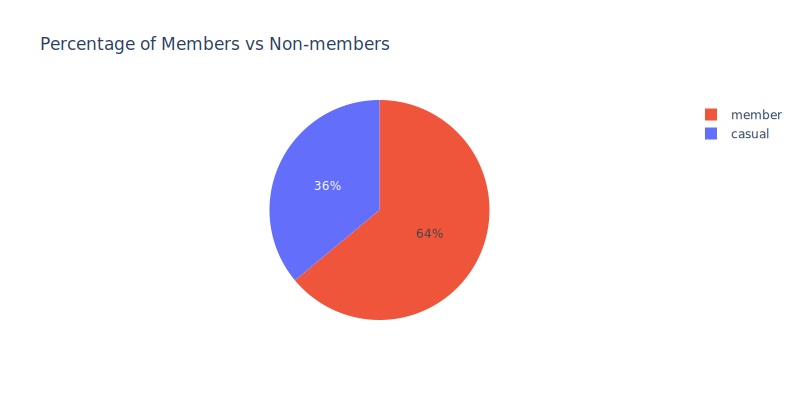

In [66]:
fig = px.pie(members_amount2, values = 'ride_id', names='member_casual', color='member_casual',
       title='Percentage of Members vs Non-members', width=800, height=400)

fig.show("svg")

Now we visualize the above numbers through a pie chart to obtain a better visuals and understanding.

**Explanation**: Similary, this is also an expected result as riders with membership would want to ride more to **fully maximize their membership.**

### 5.2. Numbers of rides.

### 5.2.1 Numbers of rides by member types across hours.

In [67]:
rides_hour = df.groupby(['member_casual','hour'], as_index=False)['ride_id'].count()
rides_hour

,member_casual,hour,ride_id
0,casual,0,22525
1,casual,1,14919
2,casual,2,8757
3,casual,3,4726
4,casual,4,3698
5,casual,5,8393
6,casual,6,20207
7,casual,7,38896
8,casual,8,54579
9,casual,9,55557


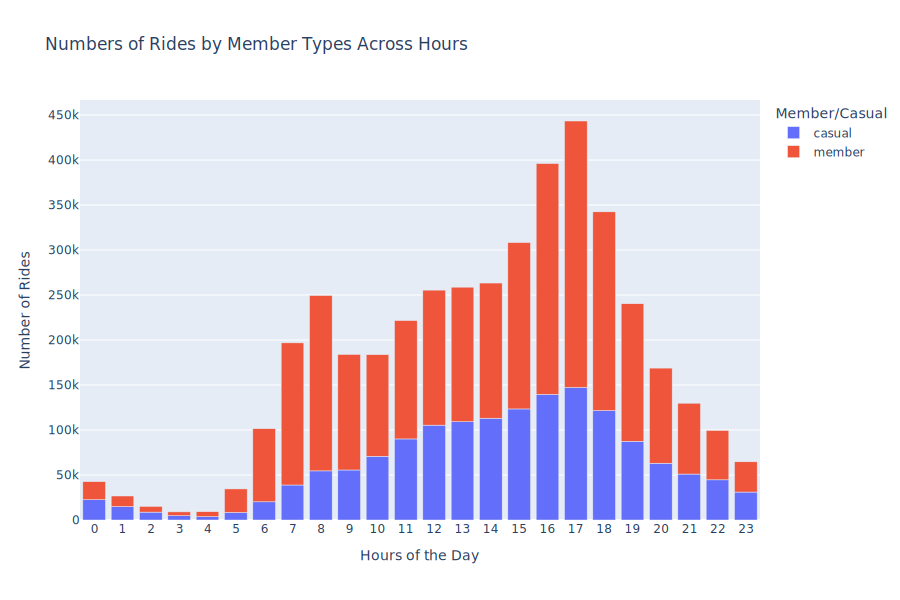

In [69]:
fig = px.bar(rides_hour, x = 'hour', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'hour':'Hours of the Day', 
                       'member_casual':'Member/Casual'}, title='Numbers of Rides by Member Types Across Hours'
             ,width=900, height=600)

fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show('svg')

From the stacked bar graph, we can clearly see that the peak time for bike usage are in between 4pm to 6pm.

**Explanation**: The peak time for bike usage are in between **4pm to 6pm**, most possibly because it is the time where people finish and **leave their work** from the office.

### 5.2.2 Numbers of rides by member types across days.

In [70]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_ordered, ordered=True)  #To order the days accordingly

rides_day = df.groupby(['member_casual','day'], as_index=False)['ride_id'].count()
rides_day

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\3691904530.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,day,ride_id
0,casual,Monday,179850
1,casual,Tuesday,162462
2,casual,Wednesday,189180
3,casual,Thursday,185324
4,casual,Friday,226243
5,casual,Saturday,320107
6,casual,Sunday,266830
7,member,Monday,395195
8,member,Tuesday,420321
9,member,Wednesday,453359


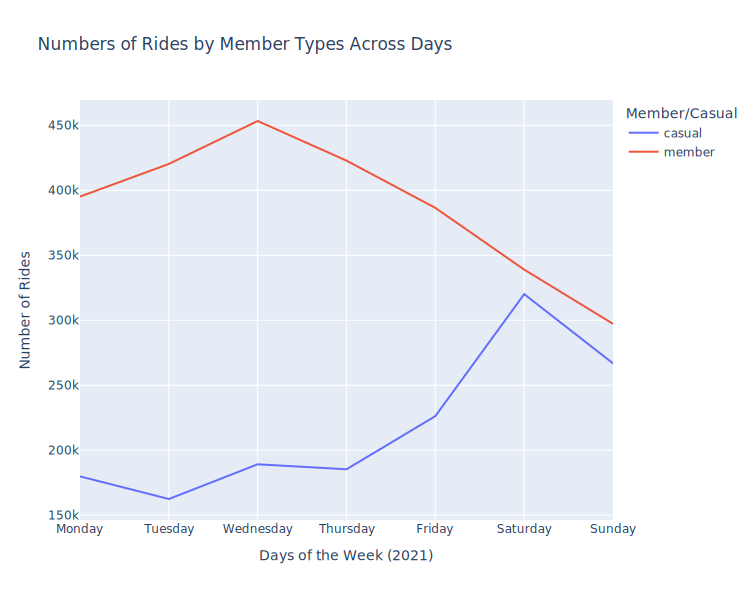

In [48]:
fig = px.line(rides_day, x = 'day', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'day':'Days of the Week (2021)', 
                       'member_casual':'Member/Casual'}, title= 'Numbers of Rides by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we can identify some interesting findings:
1. **Casual riders** rode the bikes mainly during the **weekends (Friday to Sunday)**.
2. **Membered riders** rode the bikes mainly during the **week days (Monday - Friday)**, and their usage remained **relatively steady** throughout the entire week.

Explanation:
1. **Casual riders** rode the bikes generally only during the weekends **for leisure**, and not routinely to work.
2. **Membered riders** rode the bikes **routinely to work**.

### 5.2.3 Numbers of rides by member types across months.

In [71]:
month_ordered = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November']

df['month'] = pd.Categorical(df['month'], categories=month_ordered, ordered=True) #Order the months

rides_month = df.groupby(['member_casual','month'], as_index=False)['ride_id'].count()
rides_month

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\3192780401.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,month,ride_id
0,casual,December,36682
1,casual,January,17712
2,casual,February,38168
3,casual,March,62801
4,casual,April,93927
5,casual,May,167524
6,casual,June,208397
7,casual,July,231970
8,casual,August,228518
9,casual,September,216143


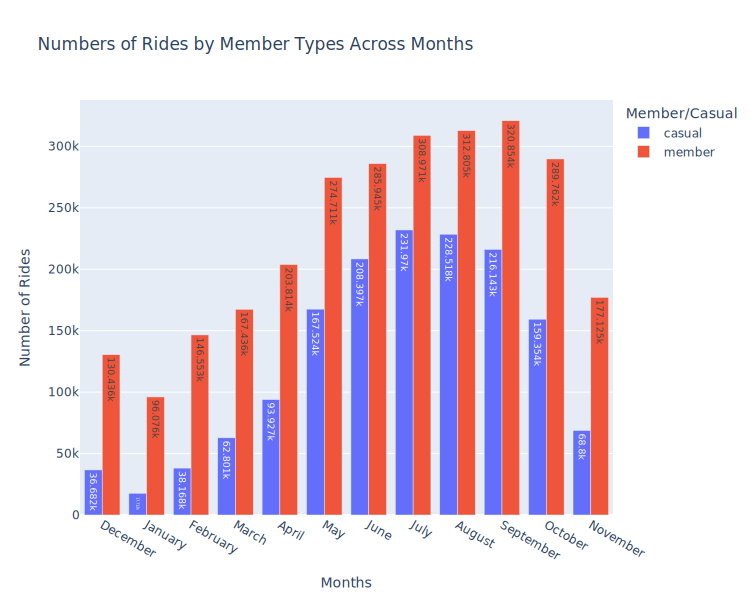

In [72]:
fig = px.bar(rides_month, x = 'month', y = 'ride_id', color = 'member_casual', 
             labels = {'ride_id':'Number of Rides', 'month':'Months', 
                       'member_casual':'Member/Casual'}, barmode='group', text_auto = True,
             title= 'Numbers of Rides by Member Types Across Months',
             width=750, height=600)


fig.show('svg')

From the grouped bar graph, we can identify some interesting findings:
1. The **peak months** were during the **summer season (June - August)** and early **autumn (September)**.
2. The months of **January and February** had the **least amount** of rides.
2. During the **peak months**, **casual riders** were **more** than membered riders.
3. **Outside** of peak months, **membered riders** were **more** than casual riders.



Explanation:
1. The summer and early autumn season has **warmer weather** which encouraged people to do more outdoor activities, including cycling.
2. January and February were during the **winter season** which was generally **too cold** for outdoor cycling.
3. Casual riders rode the bikes during the **summer** for **leisure purposes** in order to **profit the good warmer weather**.
3. Membered riders rode the bikes mainly for **work routinely**.

### 5.3. Ride durations

### 5.3.1 Ride duration by member types across days

In [73]:
ride_duration_day = df.groupby(['member_casual', 'day'], as_index=False)['ride_duration'].mean()
ride_duration_day

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\4014238450.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,day,ride_duration
0,casual,Monday,23.253277
1,casual,Tuesday,20.680696
2,casual,Wednesday,21.362054
3,casual,Thursday,20.883527
4,casual,Friday,23.162663
5,casual,Saturday,27.224132
6,casual,Sunday,27.635462
7,member,Monday,11.900202
8,member,Tuesday,11.931052
9,member,Wednesday,12.154481


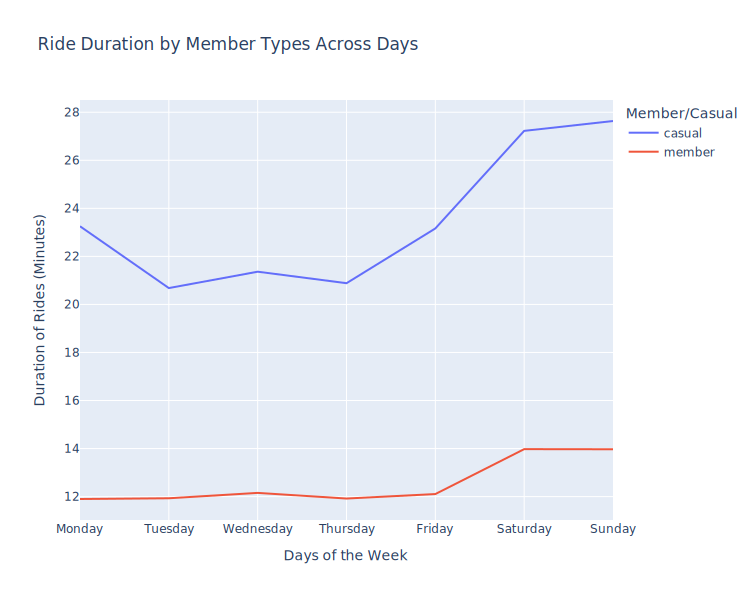

In [75]:
fig = px.line(ride_duration_day, x = 'day', y = 'ride_duration', color = 'member_casual', 
             labels = {'ride_duration':'Duration of Rides (Minutes)', 'day':'Days of the Week', 
                       'member_casual':'Member/Casual'}, title= 'Ride Duration by Member Types Across Days'
             ,width=750, height=600)


fig.show('svg')

From the line graph, we obtain that:
1. The duration of rides for **casual riders** were **much higher** than membered riders, almost upwards of 2.5-3.0 times.
2. The duration of rides **increased during the week end**, and especially much higher for casual riders.

Explanation:
1. **Casual riders** did not ride the bikes as regularly, and only rode them generally for **leisure**, while **membered riders** rode the bikes **routinely for work**.
2. People had **more time for leisure** during the **weekend** and were able to rode the bikes longer.

### 5.4.  Type of bikes

### 5.4.1  Which types of bikes are most popular

In [76]:
bikes_popularirty_day = df.groupby(['member_casual','rideable_type', 'day'], as_index = False)['ride_id'].count()
bikes_popularirty_day

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\1456016930.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,member_casual,rideable_type,day,ride_id
0,casual,classic_bike,Monday,110873
1,casual,classic_bike,Tuesday,98019
2,casual,classic_bike,Wednesday,115367
3,casual,classic_bike,Thursday,111645
4,casual,classic_bike,Friday,140214
5,casual,classic_bike,Saturday,218836
6,casual,classic_bike,Sunday,181140
7,casual,electric_bike,Monday,64910
8,casual,electric_bike,Tuesday,61216
9,casual,electric_bike,Wednesday,70051


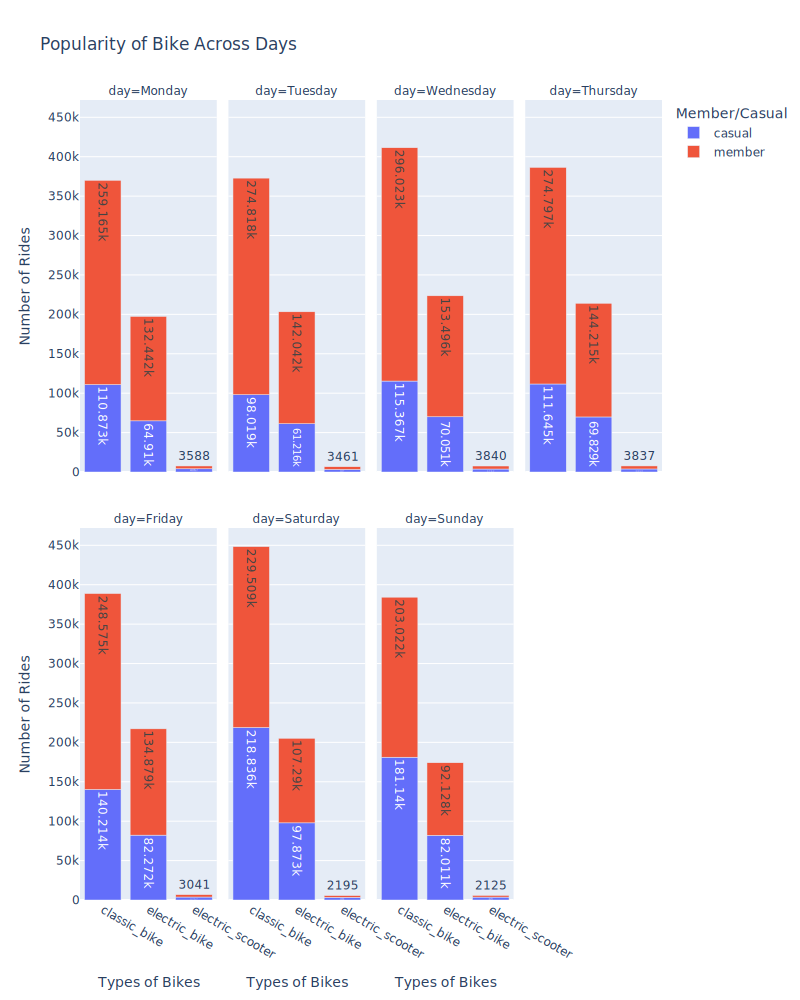

In [77]:
fig = px.bar(bikes_popularirty_day, x = 'rideable_type', y = 'ride_id', color = 'member_casual', facet_col = 'day',
       facet_col_wrap=4,
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'member_casual':'Member/Casual'},
        title = 'Popularity of Bike Across Days',
       text_auto=True, width = 800, height = 1000)

fig.show('svg')

In [78]:
bike_general = df.groupby(['rideable_type', 'day'], as_index = False)['ride_id'].count()
bike_general

C:\Users\mk\AppData\Local\Temp\ipykernel_11560\4285830029.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,rideable_type,day,ride_id
0,classic_bike,Monday,370038
1,classic_bike,Tuesday,372837
2,classic_bike,Wednesday,411390
3,classic_bike,Thursday,386442
4,classic_bike,Friday,388789
5,classic_bike,Saturday,448345
6,classic_bike,Sunday,384162
7,electric_bike,Monday,197352
8,electric_bike,Tuesday,203258
9,electric_bike,Wednesday,223547


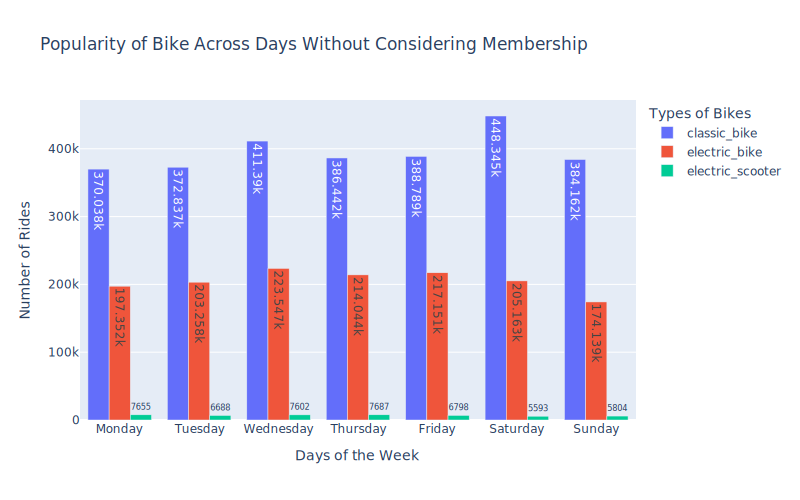

In [79]:
fig = px.bar(bike_general, x = 'day', y = 'ride_id', color = 'rideable_type', barmode='group', 
       labels = {'ride_id':'Number of Rides', 'rideable_type':'Types of Bikes', 'day': 'Days of the Week'},
        title = 'Popularity of Bike Across Days Without Considering Membership',
       text_auto=True, width = 800)

fig.show('svg')

From the 2 bar graphs that shows the bike popualrity, we obtain that:
1. **Classic bikes** were the **most popoular**, runner up were electric bikes, while docked bikes were the least popular.
2. This **trend is similar** for both casual riders and membered riders.

## Act Phase
The "Act" phase is the phase where we execute the solutions to solve our problems. After receiving feedback and carry out improvements, we finally decide the best course of action. 


Deliverable: **Top three recommendations based on the analysis**

### Top three recommendations based on the analysis
After carrying out different types of analysis including (1) analyzing the number of rides across hours, days and months, (2) duration of rides and (3) popularity of bikes, I identified several interesting trends, the mains ones were:
1. **Casual riders** rode the bikes mainly for **leisure**.
2. **Membered riders** rode the bikes mainly to go **to work routinely**.
3. **Casual riders** rode the bikes **2.5-3.0 times longer** than membered ride.
4. The **peak days** with the most riders were during **the weekend**.
5. The **peak months** with the most riders were during the **summer season (June - August)** due to warmer weathers.

According to these findings and the **main objective** of converting casual riders into annual members, my top 3 recommendations are:

1. Provide **better deals** for **longer ride durations**
    - Casual riders rode the bikes longer for leisure purposes.
    - If there were annual membership deals that **benefit longer ride durations**, these casual riders would be attracted to them.
    

2. Provide **better deals** during the **summer season/ the weekends**
    - Summer season and the weekends had the most amount of casual riders.
    - Provide **short term membership** for the summer season or the weekends would attract these casual riders that rode the bikes for leisure.
    - Once their short term membership ends, provide deals to continue their membership into an annual memberships.


3. Improve bike facilities **during the winter**
    - The winter season has cold harsh weather and accumulating snow that might affect the efficiency of bike routes, which led to greatly reduced riders.
    - Work with other parties to ensure bike routes are regularly mantained especially during the winter season.